# Step 3: Diffusion Equation in 1-D

The one-dimensional diffusion equation is:

$$
\frac{\partial u}{\partial t} = \nu \frac{\partial^2u}{\partial x^2}
$$

The first thing you should notice is that - unlike the previous two simple equations we have studied - this equation has a second-order derivative. We first need to learn what to do with it!

## Discretizing $\frac{\partial^2u}{\partial x^2}$

The second-order derivative can be represented geometrically as the line tangent to the curve given by the first derivative. We will discretize the second-order derivative with a Central Difference scheme: a combination of Forward Difference and Backward Difference on the first derivative. Consider the Taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:

$$
u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)
$$

$$
u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)
$$

If we add these two expansion, you can see that the odd-numbered derivative terms will cancel each other out. If we neglect any terms of $O(\Delta x^4) or higher (and really, those are very small), then we can rearrange the sum of these two expansions to solve for our second-derivative.

$$
u_{i+1} + u_{i-1} = 2u_i + \Delta x^2\frac{\partial^2u}{\partial x^2}\bigg|_i + O(\Delta x^4)
$$

Then rearrange to solve for $\frac{\partial^2u}{\partial x^2}\bigg|_i$ and the result is:

$$
\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)
$$


## Back to Step 3

We can now write the discretized version of the diffusion equation in 1D:

$$
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}
$$

As before, we notice that once we have an initial condition, the only unknown is $u^{n+1}_i$, so we re-arrange the equation solving for our unknown:

$$
u^{n+1}_1 = u^n_i + \frac{\nu\Delta t}{\Delta x^2}(u^n_{i+1} - 2u^n_i + u^n_{i-1})
$$

The above discrete equation allows us to write a program to advance a solution in time. But we need an initial condition - the hat function. So, at $t = 0$, $u = 2$ in the interval $0.5 \leq x \leq 1$ and $u = 1$ everywhere else.


## Code

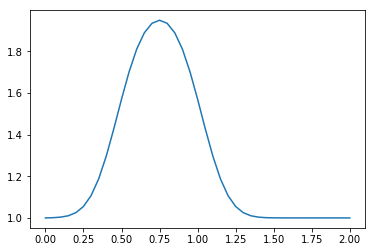

In [11]:
# -------
# Imports
# -------
import numpy as np
from matplotlib import pyplot
%matplotlib inline

# ---------
# Variables
# ---------

nx = 41            # Number of grid points
dx = 2 / (nx - 1)  # Distance between grid points
nt = 20            # Number of time steps
nu = 0.3           # Viscosity (nu)
sigma = 0.2        
dt = sigma * dx**2 / nu # Size of time step

# ------------
# Initial Cond
# ------------

u = np.ones(nx)
u[int(0.5 / dx):int(1 / dx + 1)] = 2

un = np.ones(nx)

for n in range(nt):
    un = np.copy(u)
    for i in range(1, nx - 1):
        u[i] = un[i] + nu * dt / (dx**2) * (un[i+1] - 2 * un[i] + un[i-1])

pyplot.plot(np.linspace(0, 2, nx), u)